In [1]:
import codecs
import numpy as np

In [20]:
def analyze_log(log_path):
    with codecs.open(log_path) as f:
        lines = [_ for _ in f.readlines() if not _.startswith('Best')]
        export = np.zeros((len(lines) // 2, 4))
        for i in range(0, len(lines), 2):
            l1 = lines[i]
            l2 = lines[i + 1]
            tr_acc = float(l1.split(',')[1].split(' ')[-1])
            tr_loss = float(l1.split(' ')[-1])
            val_acc = float(l2.split(',')[0].split(' ')[-1])
            val_loss = float(l2.split(' ')[-1])
            export[i // 2] = np.array((tr_acc, tr_loss, val_acc, val_loss))

    from matplotlib import pyplot as plt

    _, plts = plt.subplots(2, 2)
    x_labels, y_labels = ['epoch'] * 4, ['train_accuracy', 'train_loss', 'validation_accuracy', 'validation_loss']
    for i in range(4):
        plts[i // 2][i % 2].set_xlabel(x_labels[i])
        plts[i // 2][i % 2].set_ylabel(y_labels[i])
        plts[i // 2][i % 2].plot(range(len(lines) // 2), export[:, i])

    plt.show()


Image model log analysis:


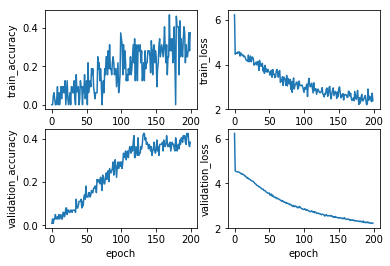

In [21]:
print('Image model log analysis:')
analyze_log('../logs/image.log')

Numerical model log analysis:


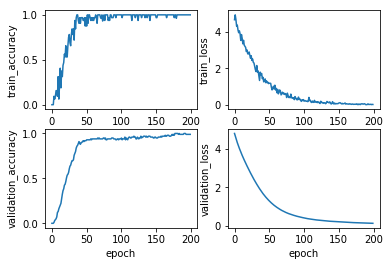

In [22]:
print('Numerical model log analysis:')
analyze_log('../logs/numerical.log')

Combined model log analysis:


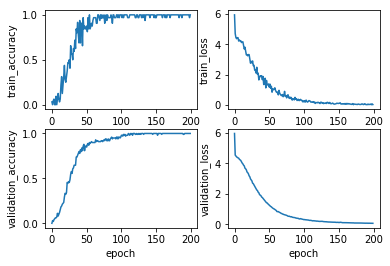

In [23]:
print('Combined model log analysis:')
analyze_log('../logs/combined.log')